# Кластеризация

## Задача 1. Кластеризация на простом примере.
Рассмотрим простой пример. Сначала сгенерируем точки из трех визуально различающихся кластеров.

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'y')

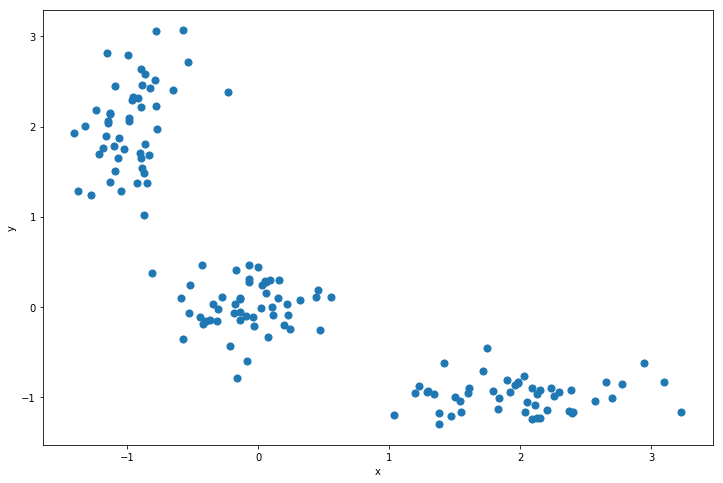

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline


X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(12,8))
plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Применим kmeans. Покрасим точки из каждого кластера в свой цвет.

Text(0, 0.5, 'y')

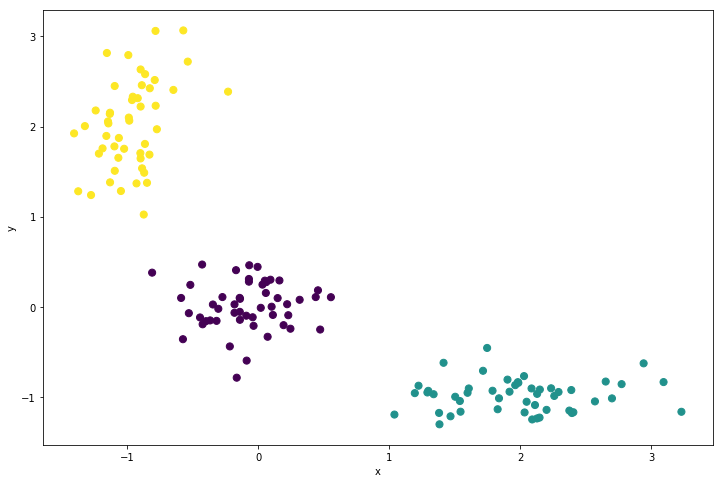

In [5]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [4]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Применим иерархическую кластеризацию.

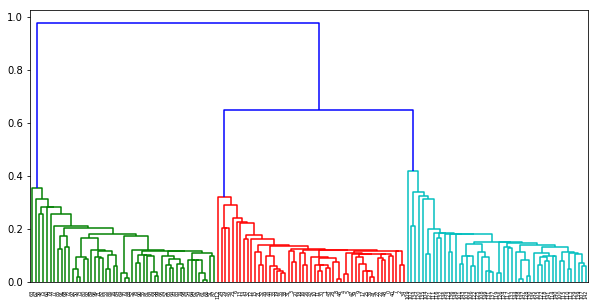

In [11]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

В зависимости от величины color_threshold меняются кластеры.

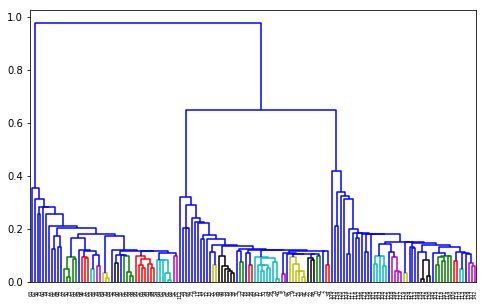

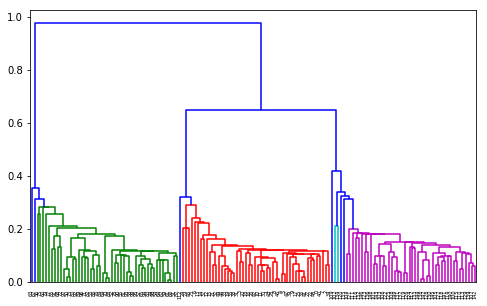

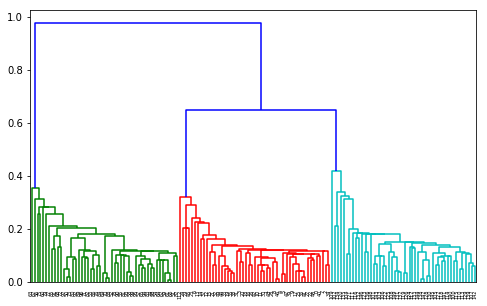

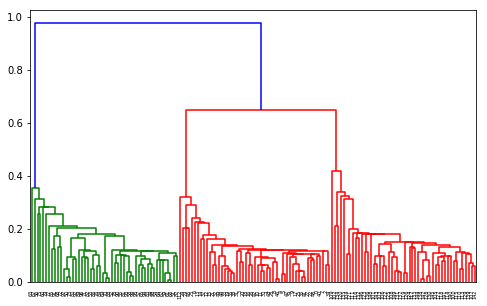

In [12]:
for threshold in [0.1, 0.3, 0.5, 0.7]:
    plt.figure(figsize=(8, 5))
    dn = hierarchy.dendrogram(Z, color_threshold=threshold)
    plt.plot()
    plt.show()

## Задача 2. кластеризация игроков NBA.

In [13]:
nba = pd.read_csv("nba_2019.csv")
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines\abrinal01,SG,25,OKC,31,2,588,56,157,...,0.923,5,43,48,20,17,6,14,53,165
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,123,4,18,...,0.700,3,22,25,8,1,4,4,24,17
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,428,38,110,...,0.778,11,49,60,65,14,5,28,45,108
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,2669,481,809,...,0.500,391,369,760,124,117,76,135,204,1108
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,1913,280,486,...,0.735,165,432,597,184,71,65,121,203,729


In [14]:
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Примените kmeans с 5ю кластерами только к числовым столбцам.

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

numeric_cols = nba._get_numeric_data().dropna(axis=1)

numeric_cols

,Rk,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,25,31,2,588,56,157,41,127,15,...,13,5,43,48,20,17,6,14,53,165
1,2,28,10,0,123,4,18,2,15,2,...,10,3,22,25,8,1,4,4,24,17
2,3,22,34,1,428,38,110,25,74,13,...,9,11,49,60,65,14,5,28,45,108
3,4,25,80,80,2669,481,809,0,2,481,...,292,391,369,760,124,117,76,135,204,1108
4,5,21,82,28,1913,280,486,3,15,277,...,226,165,432,597,184,71,65,121,203,729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,526,20,81,81,2503,525,1256,156,482,369,...,414,64,237,301,653,72,15,308,140,1549
526,527,26,49,47,1243,190,345,6,22,184,...,141,110,223,333,102,38,41,62,164,497
527,528,29,6,1,93,16,30,0,1,16,...,18,11,13,24,4,1,3,4,20,46
528,529,22,59,25,1082,183,331,0,0,183,...,132,108,212,320,53,13,22,61,113,459


In [16]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(numeric_cols)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
kmeans.labels_

array([2, 1, 1, 3, 0, 1, 1, 3, 1, 2, 0, 2, 0, 2, 4, 1, 1, 3, 1, 1, 4, 0,
       0, 0, 0, 2, 0, 1, 1, 4, 2, 2, 3, 4, 2, 0, 2, 2, 0, 3, 0, 1, 0, 2,
       0, 2, 1, 4, 0, 2, 2, 0, 2, 3, 1, 0, 3, 1, 2, 1, 3, 1, 0, 1, 2, 0,
       4, 2, 2, 0, 1, 1, 4, 0, 1, 2, 2, 4, 4, 0, 4, 4, 1, 0, 2, 2, 0, 2,
       0, 0, 2, 4, 4, 1, 2, 2, 0, 1, 1, 2, 4, 1, 1, 2, 2, 2, 3, 0, 4, 0,
       1, 3, 4, 4, 2, 4, 4, 4, 4, 1, 0, 2, 4, 3, 2, 3, 1, 4, 1, 4, 2, 1,
       2, 1, 3, 1, 2, 2, 4, 0, 1, 3, 2, 0, 1, 4, 3, 4, 4, 3, 1, 1, 1, 4,
       3, 4, 1, 1, 1, 4, 2, 2, 0, 2, 1, 4, 4, 0, 0, 3, 3, 1, 4, 1, 1, 2,
       0, 4, 1, 0, 1, 0, 3, 0, 2, 0, 3, 1, 3, 0, 2, 2, 2, 0, 2, 1, 0, 0,
       4, 4, 0, 3, 1, 1, 0, 3, 4, 3, 4, 4, 0, 3, 1, 4, 4, 1, 1, 0, 1, 4,
       2, 4, 1, 3, 1, 2, 4, 2, 2, 3, 0, 1, 4, 4, 0, 0, 2, 1, 0, 1, 1, 2,
       0, 4, 4, 0, 1, 0, 3, 0, 4, 1, 4, 4, 0, 4, 3, 3, 1, 1, 4, 1, 2, 1,
       4, 4, 4, 2, 3, 1, 4, 1, 1, 1, 4, 0, 0, 2, 0, 4, 4, 1, 4, 2, 0, 2,
       2, 4, 2, 4, 3, 1, 0, 3, 4, 2, 1, 1, 1, 0, 3,

Визуализируйте данные с помощью метода главных компонент с n_components = 2:

    1) Примените метод главных компонент
    
    2) Нарисуйте полученные точки на плоскости, раскрашенные в цвета, соответствующие кластерам (см. пример выше)

In [19]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(numeric_cols)

X_pca.shape

(530, 2)

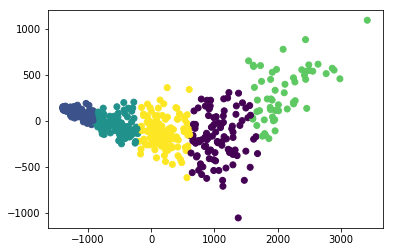

In [21]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)

***Мы видим, что kmeans разбил игроков на 5 практически не пересекающихся, но лежащих близко друг к другу кластеров.***

* Попытаемся понять, на основании каких факторов объекты были разбиты на кластеры.

Посмотрим, какое смысловое значение несут кластеры.

1) Визуализируйте точки в осях nba['PTS'] (total points) и nba['AST'] (total assistances) и раскрасьте их в цвета кластеров.

2) Визуализируйте точки в осях nba['Age'] (age) и nba['MP'] (minutes played) и раскрасьте их в цвета кластеров.

Подпишите оси.

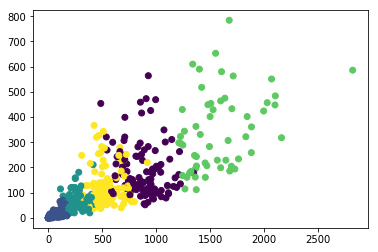

In [23]:
plt.scatter(nba['PTS'], nba['AST'], c=kmeans.labels_)

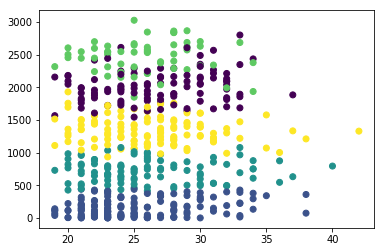

In [25]:
plt.scatter(nba['Age'], nba['MP'], c=kmeans.labels_)

### Инициализация центров кластеров (центроидов)

Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:
- `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
- `random` – случайная инициализация центроидов.
- `ndarray` – заданная инициализация центроидов.

## Задача 3. Сжатие изображений с K-means.

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('cat.jpg')[..., 1]
plt.figure(figsize = (15, 9))
plt.axis('off')
plt.imshow(img, cmap='gray');

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

X = img.reshape((-1, 1))

for n in np.arange(5, 100, 5):
    print('N = ', n)
    k_means = MiniBatchKMeans(n_clusters=n)
    k_means.fit(X) 
    values = k_means.cluster_centers_
    labels = k_means.labels_
    img_compressed = values[labels].reshape(img.shape)
    plt.figure(figsize = (5, 3))
    plt.axis('off')
    plt.imshow(img_compressed, cmap = 'gray');
    plt.show()

Возьмите любую фотографию (можно работать с той же) и подберите минимальное число кластеров, которое визуально не ухудшает качество изображения.

In [ ]:
#your code here

## Задача 4. Нахождение тем в текстах.

**Применим KMeans для кластеризации текстов из 4 новостных категорий.**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time

categories = [
    'talk.politics.misc',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

**Закодируем тексты с помощью TF-IDF признаков.**

![How](tf-idf.png)

In [ ]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1300,
                             min_df=2, stop_words='english') 

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

**И применим к получившимся векторам метод $k$ средних.

In [ ]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

**Выведем слова, соответствующие самым весомым компонентам центров кластеров.**

In [ ]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

### ***Мы видим, что алгоритм разделил документы на кластеры, которые приблизительно соответствуют четырем заявленным темам. Однако внутри кластеров есть много неточностей, т.е. слов, не относящихся к заявленным темам.***

Как оценить качество полученной кластеризации?

## Метрики качества кластеризации

* Внешние метрики – используют информацию об истинных метках объектов

* Внутренние метрики – оценивают качество кластеризации, основываясь только на наборе данных.

### Внешние метрики:

**1. Adjusted Rand Index (ARI)** - это *доля объектов, для которых исходное (правильные метки) и полученное (кластеры) разбиения согласованы. Выражает похожесть двух различных разбиений выборки*.

$$ARI \in [-1;1]$$

$ARI>0$ – разбиения похожи ($ARI=1$ – совпадают)

$ARI\approx 0$ – случайные разбиения

$ARI<0$ – непохожие разбиения

In [ ]:
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))

**2. Adjusted Mutual Information (AMI, взаимная информация)** -* измеряет долю информации, общей для обоих разбиений: насколько информация об одном из них уменьшает неопределенность относительно другого.*  

$$AMI \in [0;1]$$

Чем ближе $AMI$ к $1$, тем более похожи разбиения.

In [ ]:
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

**3. Гомогенность (Homogeneity), Полнота (Completeness), V-мера (V-measure):**
* *Гомогенность (H) измеряет, насколько каждый кластер состоит из объектов одного класса, т.е. насколько однородны объекты внутри кластера.*
* *Полнота (C) измеряет, насколько объекты одного класса относятся к одному кластеру.*
    
$$H \in [0;1], C \in [0;1].$$

Большие значения гомогенности и полноты соответствуют более точной кластеризации.

* *V-мера - среднее гармоническое гомогенности и полноты, используется, если хотим анализировать один показатель вместо двух. V-мера показывает, насколько два разбиения схожи.* 

In [ ]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

**Важно!**

***Гомогенность, полнота и V-мера не нормализованы (как ARI и AMI), т.е. они зависят от числа кластеров!***

* При большом числе кластеров и малом числе объектов лучше использовать ARI и AMI.
* При более 1000 объектов и числе кластеров меньше 10 проблема не так сильно выражена, поэтому её можно игнорировать.

### Внутренняя метрика:
(не требует знания истинных меток)

**Силуэт (S, silhouette)** - *показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров.*

$$S \in [-1;1]$$

* $𝑆$ близкий к $-1$ – плохие (разрозненные) кластеризации
* $S\approx 0$ – кластеры накладываются друг на друга
* $𝑆$ близкий к $1$ – четко выраженные кластеры

***С помощью силуэта можно выбирать число кластеров $𝑘$ (если оно заранее неизвестно) – выбирается $𝑘$, для которого метрика максимальна.***

In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

## Задача 5. Кластеризация рукописных цифр.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target
Im = digits.images

Выведите на экран первые 20 цифр (в цветовой схеме 'gray')

In [ ]:
#your code here

Обучите kmeans с десятью кластерами.

In [ ]:
#your code here

Выведите на экран метрики качества кластеризации

In [ ]:
#your code here

Нарисуем центры получившихся кластеров.

In [ ]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), model.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

Кластеризация получилась довольно качественной. Визуализируем наши объекты (изображения цифр) как точки на двумерной плоскости.

Визуализируйте данные с помощью PCA с двумя компонентами.

In [ ]:
from sklearn.decomposition import PCA

#your code here

Визуализируем данные с помощью t-SNE

In [ ]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

## Полезные ссылки
- <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means</a> на Википедии
- <a href="https://habr.com/ru/post/208496/">Статья</a> про нечеткую кластеризацию на Хабрахабре
- <a href="https://scikit-learn.org/stable/modules/clustering.html">обзор</a> методов кластеризации в sklearn

# Домашнее задание

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

Мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://yadi.sk/d/_WFxgSIuBF06Rg. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [ ]:
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [ ]:
X_train = np.loadtxt("samsung_train.txt")
y_train = np.loadtxt("samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("samsung_test.txt")
y_test = np.loadtxt("samsung_test_labels.txt").astype(int)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

In [ ]:
#your code here
X = 
y =

In [ ]:
np.unique(y)

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

Отмасштабируйте выборку с помощью StandardScaler.

In [ ]:
#your code here
scaler = 
X_scaled =

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

In [ ]:
#your code here
pca = 
X_pca =

Визуализируйте данные в проекции на первые две главные компоненты.

In [ ]:
#your code here
plt.scatter(, , c=y, s=20, cmap='viridis');

Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

In [ ]:
#your code here

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [ ]:
#your code here

Выведите на экран значения метрик качества кластеризации

In [ ]:
#your code here

Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

In [ ]:
#your code here

Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

In [ ]:
#your code here